# ARIMA Model for the energy data

In [28]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
clean_energy_url = "https://raw.githubusercontent.com/gokce-d/DS4A_Team37/master/Clean_Energy_Index.csv"
clean_energy_index = pd.read_csv(clean_energy_url)
clean_energy_index = clean_energy_index.rename(columns={"Clean_Energy": "Index"})
clean_energy_index["Date"] = pd.to_datetime(clean_energy_index['Date'])
clean_energy_index = clean_energy_index.set_index("Date") 

clean_energy_index.tail()

,Index
Date,
2021-09-20,1396.38
2021-09-21,1410.85
2021-09-22,1429.32
2021-09-23,1444.49
2021-09-24,1418.43


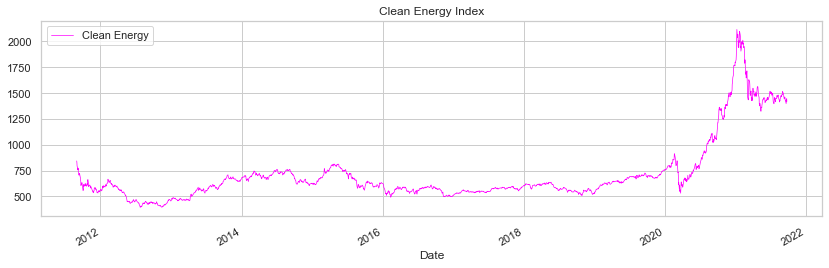

In [33]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_index['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index")
plt.legend()
plt.savefig('DS4A/plots/clean_all.jpg');

In [34]:
# Until 1 Mar 2020: Before Covid; after 1 Mar 2021 After Covid; after 1 Sep 2021 test data
clean_energy_before = pd.DataFrame(clean_energy_index.loc[:"2020-03-01"])
clean_energy_after = pd.DataFrame(clean_energy_index.loc["2021-03-01":"2021-08-31"])
clean_energy_test = pd.DataFrame(clean_energy_index.loc["2021-09-01":])

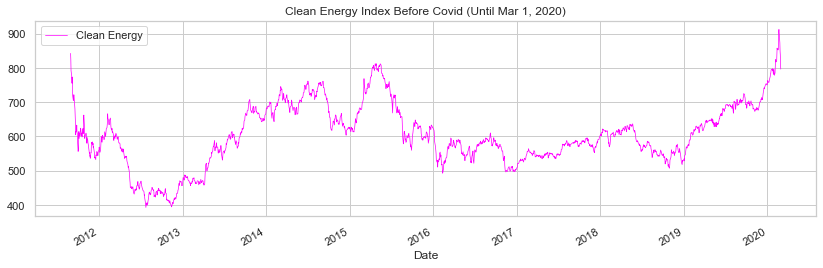

In [35]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_before['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index Before Covid (Until Mar 1, 2020)")
plt.legend()
plt.savefig('DS4A/plots/clean_before.jpg');

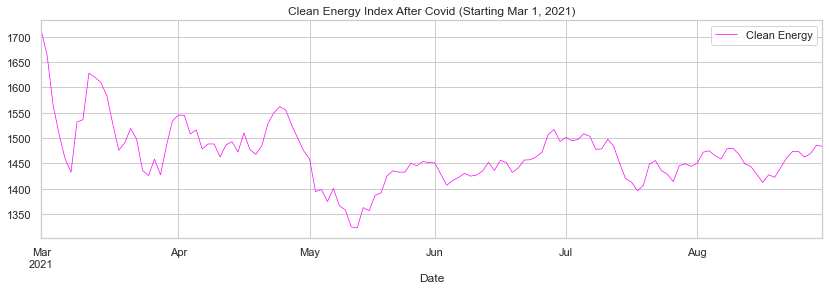

In [36]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.set_theme(style="whitegrid")
clean_energy_after['Index'].plot(linewidth=0.7, color="magenta", label="Clean Energy")
plt.title("Clean Energy Index After Covid (Starting Mar 1, 2021)")
plt.legend()
plt.savefig('DS4A/plots/clean_after.jpg');

In [8]:
print("Clean Energy mean before COVID: ", round(clean_energy_before["Index"].mean(),2), "Clean Energy mean before COVID: ", round(clean_energy_after["Index"].mean(),2))

Clean Energy mean before COVID:  603.34 Clean Energy mean before COVID:  1467.16


## Fit arima to the after covid

In [37]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(clean_energy_after["Index"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#From here we understand no differencing is needed

ADF Statistic: -4.518962
p-value: 0.000182


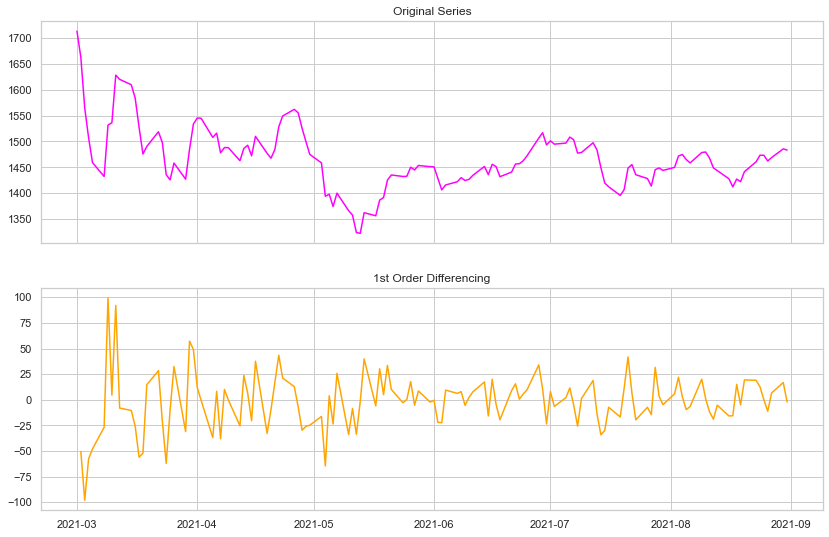

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.set(rc={'figure.figsize':(14, 9)})
sns.set_theme(style="whitegrid")
# Original Series
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(clean_energy_after.Index, c="magenta"); 
axes[0].set_title('Original Series')
# plot_acf(clean_energy_before.Index, ax=axes[0, 1])

# 1st Differencing
axes[1].plot(clean_energy_after.Index.diff(), color = "orange"); axes[1].set_title('1st Order Differencing')
# plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

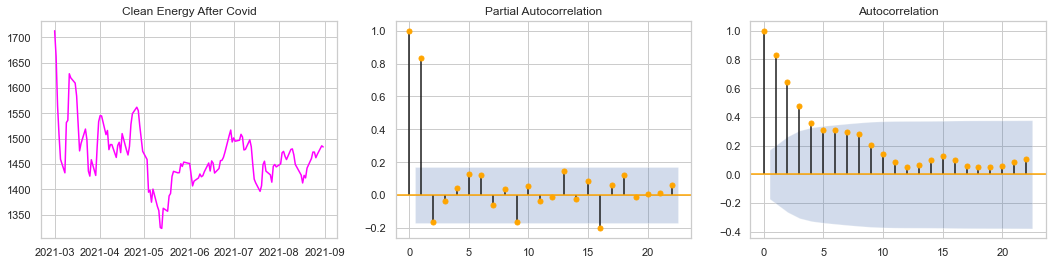

In [51]:
sns.set(rc={'figure.figsize':(18, 4)})
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3)
axes[0].plot(clean_energy_after.Index, color="magenta") 
axes[0].set_title('Clean Energy After Covid')
# axes[1].set(xlim=(-1,100))
plot_pacf(clean_energy_after.Index, ax=axes[1], color="orange")
plot_acf(clean_energy_after.Index, ax=axes[2], color="orange")
plt.savefig('DS4A/plots/clean_p_acf.jpg');


In [43]:
from statsmodels.tsa.arima.model import ARIMA
model_after = ARIMA(clean_energy_after.Index, order=(1,0,3))
model_after_fit = model_after.fit()
print(model_after_fit.summary())

/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/Users/gokced/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Index   No. Observations:                  132
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -615.366
Date:                Wed, 20 Oct 2021   AIC                           1242.731
Time:                        21:52:54   BIC                           1260.028
Sample:                    03-01-2021   HQIC                          1249.760
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1477.6297     20.155     73.314      0.000    1438.127    1517.132
ar.L1          0.8010      0.051     15.577      0.000       0.700       0.902
ma.L1          0.3317      0.105      3.166      0.0

After checking the results decided to fit ARIMA(1,0,3) to go with the simpler version

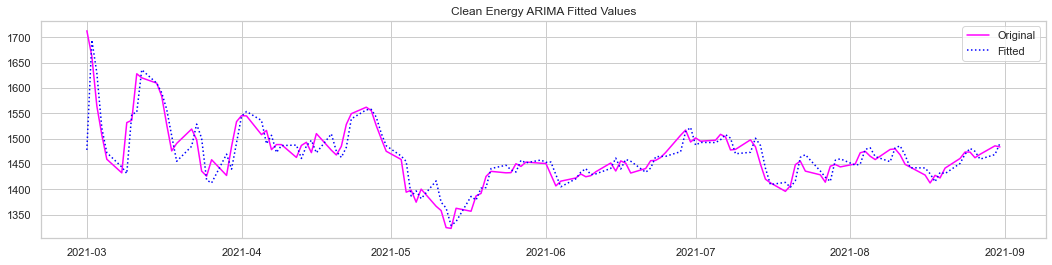

In [56]:
plt.plot(clean_energy_after.Index, color="magenta", label="Original")
plt.plot(model_after_fit.fittedvalues, c="blue", linestyle=":", label="Fitted")
plt.title("Clean Energy ARIMA Fitted Values")
plt.legend()
plt.savefig('DS4A/plots/clean_fitted.jpg'); 

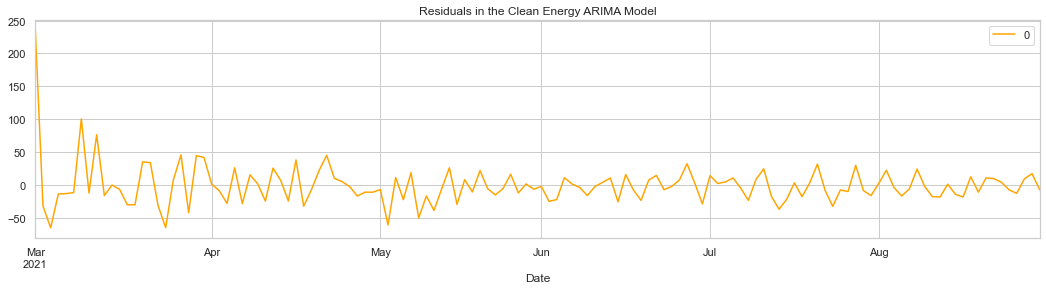

In [59]:
residuals = pd.DataFrame(model_after_fit.resid)
residuals.plot(color="orange")
plt.title("Residuals in the Clean Energy ARIMA Model")
plt.savefig('DS4A/plots/clean_residual.jpg'); 
# plt.ylim(-50,50)

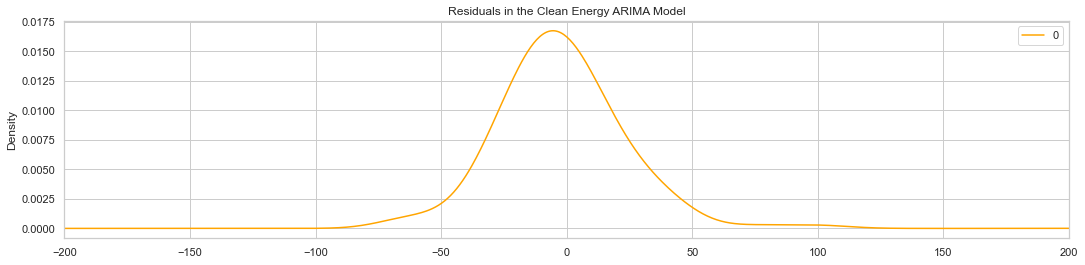

In [66]:
residuals.plot(kind='kde', color="orange")
plt.title("Residuals in the Clean Energy ARIMA Model")
plt.xlim(-200,200)
plt.savefig('DS4A/plots/clean_residual_kde.jpg'); 


In [16]:
from statsmodels.tsa.arima.model import ARIMA
predictions = list()
history = [x for x in clean_energy_after.Index]
for t in range(len(clean_energy_test)):
    model_after_2 = ARIMA(history, order=(1,0,3))
    model_after_2_fit = model_after_2.fit()
    output = model_after_2_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = clean_energy_test.Index[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1487.146499, expected=1498.290000
predicted=1498.376656, expected=1514.210000
predicted=1514.799835, expected=1502.950000
predicted=1501.308155, expected=1497.680000
predicted=1491.543842, expected=1488.040000
predicted=1481.719800, expected=1460.380000
predicted=1454.933932, expected=1459.620000
predicted=1457.061666, expected=1441.430000
predicted=1441.116918, expected=1461.160000
predicted=1466.525826, expected=1457.470000
predicted=1462.412599, expected=1433.520000
predicted=1433.207698, expected=1423.160000
predicted=1419.255915, expected=1424.500000
predicted=1428.166719, expected=1396.380000
predicted=1401.499113, expected=1410.850000
predicted=1417.065515, expected=1429.320000
predicted=1439.383611, expected=1444.490000
predicted=1457.914119, expected=1418.430000


In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(clean_energy_test.Index, predictions))
mse  = mean_squared_error(clean_energy_test.Index, predictions)
mae  = mean_absolute_error(clean_energy_test.Index, predictions)
mape = mean_absolute_percentage_error(clean_energy_test.Index, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test RMSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

Test RMSE: 17.548
Test RMSE: 307.915
Test MAE: 14.382
Test MAPE: 0.010


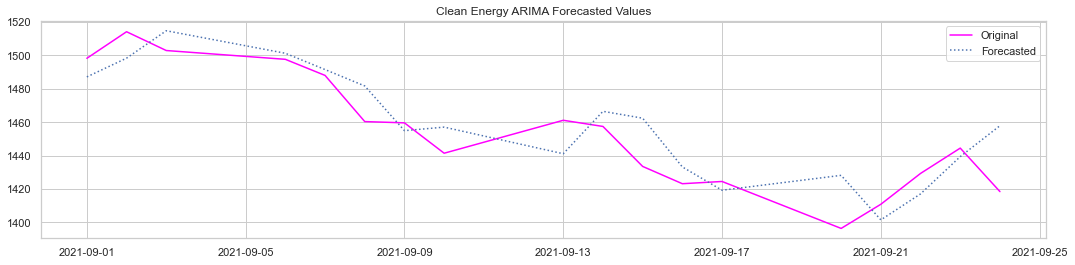

In [65]:
plt.plot(clean_energy_test.Index,color='magenta', label="Original")
plt.plot(clean_energy_test.index,predictions, linestyle=":", label="Forecasted")
plt.title("Clean Energy ARIMA Forecasted Values")
plt.legend()
plt.savefig('DS4A/plots/clean_forecasted.jpg'); 